In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

C:\Users\Myer\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv('top70.csv')

In [17]:
data.head()

,ID,Company,Beta,BVPS,DY,DPS,ebtda,eps,MV,PE,...,GDP per Capita,Change in Gdp,Change in Public Debt,Change in Goods and service,Change in Current Account,"BETA(rs,GDP)","BETA(rs,PD)","BETA(rs,GS)","BETA(rs,CA)",Market retun
0,2,ABBOTT LABS.(PAK.),0.904370,118.087900,4.138370,19.481630,4.879387e+06,30.118667,52290.646520,17.471852,...,281.369979,-0.005721,0.00478,0.006943,-0.061915,0.0011,(0.0046),(0.0171),0.8326,0.0118
1,22,AL-KHAIR GADOON,0.506222,21.403167,3.463704,0.355556,3.585800e+04,22.696074,114.000741,5.718519,...,281.369979,-0.005721,0.00478,0.006943,-0.061915,0.0296,(0.0051),(0.0274),0.1040,0.0118
2,26,ALLAWASAYA TEXTILE,-0.128889,1004.752714,4.194370,8.808519,5.569789e+04,26.576222,287.344148,11.497196,...,281.369979,-0.005721,0.00478,0.006943,-0.061915,(0.0038),(0.0021),(0.0955),(0.1846),0.0118
3,36,ARCHROMA PAKISTAN,0.661407,140.404128,8.226815,36.248889,2.238490e+06,39.213556,15325.729700,11.475556,...,281.369979,-0.005721,0.00478,0.006943,-0.061915,0.0339,(0.0063),(0.1156),0.7810,0.0118
4,61,BABRI COTTON MILLS,0.478074,229.220000,0.000000,0.000000,-3.090167e+04,0.000000,190.327630,NaN,...,281.369979,-0.005721,0.00478,0.006943,-0.061915,0.0074,(0.0003),(0.0145),0.2348,0.0118


In [9]:
data.head()
data =data.replace(r'^\s*$', np.nan, regex=True)

In [24]:
X=data.iloc[:,[2,19]].values

In [25]:
X

array([[ 9.04370370e-01,  1.06946444e+02],
       [ 5.06222222e-01,  1.06946444e+02],
       [-1.28888889e-01,  1.06946444e+02],
       [ 6.61407407e-01,  1.06946444e+02],
       [ 4.78074074e-01,  1.06946444e+02],
       [ 7.55037037e-01,  1.06946444e+02],
       [ 3.32074074e-01,  1.06946444e+02],
       [ 3.26814815e-01,  1.06946444e+02],
       [ 7.43259259e-01,  1.06946444e+02],
       [ 1.13851852e+00,  1.06946444e+02],
       [ 8.59851852e-01,  1.06946444e+02],
       [ 4.39777778e-01,  1.06946444e+02],
       [ 1.10074074e-01,  1.06946444e+02],
       [ 2.20444444e-01,  1.06946444e+02],
       [ 2.88370370e-01,  1.06946444e+02],
       [ 7.30518519e-01,  1.06946444e+02],
       [ 7.75629630e-01,  1.06946444e+02],
       [ 2.04518519e-01,  1.06946444e+02],
       [ 1.05718519e+00,  1.06946444e+02],
       [ 3.82148148e-01,  1.06946444e+02],
       [ 1.16229630e+00,  1.06946444e+02],
       [ 1.20933333e+00,  1.06946444e+02],
       [ 4.84518519e-01,  1.06946444e+02],
       [ 1.

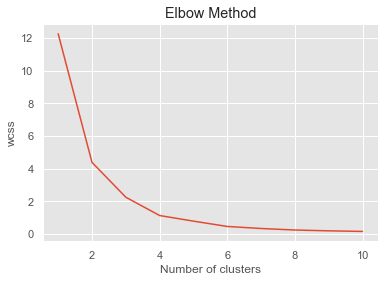

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
    

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5498784921733085
For n_clusters=3, The Silhouette Coefficient is 0.5134607322911044
For n_clusters=4, The Silhouette Coefficient is 0.5683246431294163
For n_clusters=5, The Silhouette Coefficient is 0.5408097551840102
For n_clusters=6, The Silhouette Coefficient is 0.5613231954579565
For n_clusters=7, The Silhouette Coefficient is 0.5656046495969841
For n_clusters=8, The Silhouette Coefficient is 0.5781836164934777
For n_clusters=9, The Silhouette Coefficient is 0.576678959177538
For n_clusters=10, The Silhouette Coefficient is 0.574715172988053


In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5498784921733085
For n_clusters=3, The Silhouette Coefficient is 0.5181988925185568
For n_clusters=4, The Silhouette Coefficient is 0.5683246431294163
For n_clusters=5, The Silhouette Coefficient is 0.5408097551840102
For n_clusters=6, The Silhouette Coefficient is 0.5613231954579565
For n_clusters=7, The Silhouette Coefficient is 0.5656046495969841
For n_clusters=8, The Silhouette Coefficient is 0.5745442379416845
For n_clusters=9, The Silhouette Coefficient is 0.5823013814158168
For n_clusters=10, The Silhouette Coefficient is 0.5690927507497743


In [29]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 12.26854812254432
k: 2  cost: 4.383277997775337
k: 3  cost: 2.26114312986721
k: 4  cost: 1.133851959855948
k: 5  cost: 0.7967230567286022
k: 6  cost: 0.4644058947526202
k: 7  cost: 0.33943987071343845
k: 8  cost: 0.24585559185271746
k: 9  cost: 0.19627514725982861
k: 10  cost: 0.16051100838075402



In [33]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

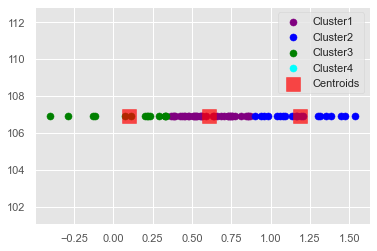

In [34]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

plt.legend()
plt.show()

In [36]:
print(labels)

[1 2 0 5 2 5 7 7 5 6 1 2 4 4 7 5 5 4 6 7 6 6 2 6 7 6 1 1 6 3 6 1 5 5 2 5 8
 3 5 7 5 4 6 9 2 9 5 3 5 2 9 2 1 2 8 7 4 7 7 1 2 4 2 3 1 0 2 1 2 2]


In [39]:
result = zip(X , kmeans.labels_)

sortedR = sorted(result, key=lambda x: x[1])
sortedR

[(array([  0.66140741, 106.9464444 ]), 0),
 (array([  0.75503704, 106.9464444 ]), 0),
 (array([  0.74325926, 106.9464444 ]), 0),
 (array([  0.73051852, 106.9464444 ]), 0),
 (array([  0.77562963, 106.9464444 ]), 0),
 (array([  0.64088889, 106.9464444 ]), 0),
 (array([  0.63525926, 106.9464444 ]), 0),
 (array([  0.68244444, 106.9464444 ]), 0),
 (array([  0.74103704, 106.9464444 ]), 0),
 (array([  0.758    , 106.9464444]), 0),
 (array([  0.70577778, 106.9464444 ]), 0),
 (array([  0.73088889, 106.9464444 ]), 0),
 (array([  1.13851852, 106.9464444 ]), 1),
 (array([  1.05718519, 106.9464444 ]), 1),
 (array([  1.1622963, 106.9464444]), 1),
 (array([  1.20933333, 106.9464444 ]), 1),
 (array([  1.19303704, 106.9464444 ]), 1),
 (array([  1.17096296, 106.9464444 ]), 1),
 (array([  1.09496296, 106.9464444 ]), 1),
 (array([  1.04074074, 106.9464444 ]), 1),
 (array([  1.08103704, 106.9464444 ]), 1),
 (array([  0.11007407, 106.9464444 ]), 2),
 (array([  0.22044444, 106.9464444 ]), 2),
 (array([  0.20

In [40]:
print(kmeans.cluster_centers_ )

[[  0.71334568 106.9464444 ]
 [  1.12756379 106.9464444 ]
 [  0.17591358 106.9464444 ]
 [ -0.34377778 106.9464444 ]
 [  1.48323457 106.9464444 ]
 [  0.37538047 106.9464444 ]
 [  0.89157202 106.9464444 ]
 [ -0.12111111 106.9464444 ]
 [  1.3387963  106.9464444 ]
 [  0.52303086 106.9464444 ]]


In [61]:


cluster_map = pd.DataFrame()

cluster_map['Company'] = data.Company
cluster_map['cluster'] = km.labels_

In [62]:
cluster_map[cluster_map.cluster == 3]

,Company,cluster
2,ALLAWASAYA TEXTILE,3
65,TOWELLERS LIMITED,3


In [63]:
cluster_map[cluster_map.cluster == 2]

,Company,cluster
0,ABBOTT LABS.(PAK.),2
10,CLOVER PAKISTAN,2
26,GILLETTE PAKISTAN,2
27,HIGHNOON LABORATORIES,2
31,IDEAL SPINNING MILLS,2
52,SANOFI AVENTIS PAKISTAN,2
59,SHAKARGANJ MILLS,2
64,THE SEARLE COMPANY,2
67,WAH NOBEL CHEMICALS,2


In [64]:
cluster_map[cluster_map.cluster == 1]

,Company,cluster
1,AL-KHAIR GADOON,1
4,BABRI COTTON MILLS,1
11,CRESCENT FIBRES,1
22,GATRON (INDUSTRIES),1
34,JANANA DE MALUCHO TEXTILE MILLS,1
44,MAQBOOL TEXTILE MILLS,1
49,PAKISTAN SYNTHETICS,1
51,RELIANCE COTTON SPINNING MILLS,1
53,SAPPHIRE FIBRES,1
60,SHIFU INTL HOSPITAL,1
